In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\rafra\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# confirmamos la exsistencia de los archivos
print(os.listdir("input/chest_xray/"))

print(os.listdir("input/chest_xray/train"))

print(os.listdir("input/chest_xray/train/"))

['test', 'train', 'val']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


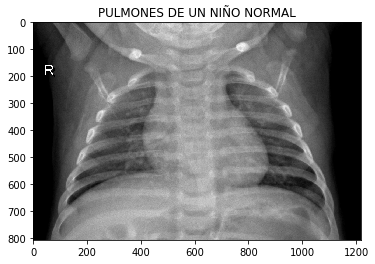

In [3]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('input/chest_xray/train/NORMAL/' 
                      + img_name)

plt.imshow(img_normal)
plt.title('PULMONES DE UN NIÑO NORMAL')
plt.show()

PNEUMONIA


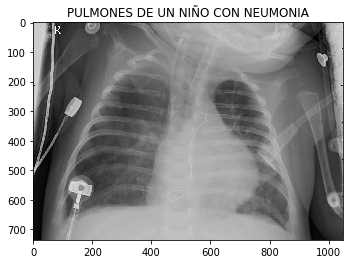

In [4]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('input/chest_xray/train/PNEUMONIA/' 
                         + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.title('PULMONES DE UN NIÑO CON NEUMONIA')
plt.show()

## Create variables

In [5]:
# dimensiones de las imagenes
img_width, img_height = 150, 150

In [6]:
# Direcciones...
train_data_dir = 'input/chest_xray/train'
validation_data_dir = 'input/chest_xray/val'
test_data_dir = 'input/chest_xray/test'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [7]:
# Definiendo con Keras el formato de entrada
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

**Caracteristicas**
   
    Modelo: Se de fine un modelo secuencial (es decir capa tras capa)
    CAPA 1: Convolucional de 32 filtros con un kernel de 3X3 capa input 
    que utiliza imagenes de 150X150px la función de activación sera 
    como en las demas el rectificador lineal unitario. Luego se le sobrepone
    una capa MaxPooling que seleccióna los valores mas altos provenientes del 
    mapa de caracteristicas.
    CAPA 2: Es igual, a la de etrada.
    CAPA 3: Capa Flatten vector de datos aplanados
    CAPA 4: Agrega una red neuronal completa de 64 neuronas, que entra como
    un vector de datos para tener todo, es un vector en vertical como capa
    de entrada de una red neuronal totalmente conectada con todos los nodos
    conectados La idea es que estén todas las capas totalmente ocultas 
    totalmente conectadas. Para que la red neuronal sea capaz de establecer
    esos vínculos esas relaciones que existen desde la capa de entrada los 
    números que han quedado simplificados después de haber sido aplanados 
    involucionado y demás y que ese vector columna resultado de la aplanamiento
    anterior sea traducido a los potenciales valores de salida

**Capas convolucionales**<font color=gray>, **32 filtros**, con **3 puntos horizontal y vertical**
El **kernel** nos permite hacer la media, la ponderación la convolución o producto convolucional del quernel con la capa
de la imagen</font>

**MaxPooling**<font color=gray>, moviendo 2 pocisiones en horizontal y vertical en una ventana, se va a quedar con el valor mas alto, despues de aplicar la convolución, el Maxpooling reducira el tamaño de la imagen. **IMPORTANTE** En consecuencia de como se comporta el paddin en la Conv2d (tomando un conjunto de 0roz)  es posible que se pierdan datos allí, por eso MaxPool2D tomara los valores (los rasgos mas may) para la convolución **por medio de un padding valido** </font> 

**Capa Flatten**<font color=gray>: Sigue siendo una imagen 2d con tres canales de color, por eso FLatten() aplana las imagenes, las convierte en un vector de datos aplanados, una vez que han sido filtrados y reducidos, esta sera la capa de entrada de una red neuronal **totalmente conectada por tanto la fase de convolución es un añadido que se le coloca a una red neuronal artificial antes de la entrada, para contruir a partir de las imagenes sus convoluciones y aplanar ese resultado para que sea la entrada.**</font>

**Dropout**<font color=gray>, es un metodo que desactiva un numero de neuronas de una red neuronal de forma aleatoria. En cada iteración de la red neuronal dropout desactivara diferentes neuronas, las neuronas desactivadas no se toman en cuenta para el forwardpropagation ni para el backwardpropagation lo que obliga a las neuronas cercanas a no depender tanto de las neuronas desactivadas. </font>

In [8]:
model = Sequential()
# Capa 1 Entrada
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa 2 Hidden Layer convolucional
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa 3 Convolucional con el doble de filtros
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa Flatten
model.add(Flatten())

# Capa 4 totalmente conectada
model.add(Dense(units=64))
model.add(Activation('relu'))

# Dropout
model.add(Dropout(0.5))

# Capa de Salida
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Chequear información del modelo 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

## Compilar

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Carga de las imagenes

In [11]:
# esta es la configuración de aumento que usaremos para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [12]:
# normalizar las imagenes
test_datagen = ImageDataGenerator(rescale=1. / 255)# (0,150, 216) ---> (0, 0.15, 0.216)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


### Ajustar el modelo

In [16]:
hisoty = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 326 steps, validate for 1 steps
Epoch 1/20
326/326 [==============================] - 433s 1s/step - loss: 0.4203 - accuracy: 0.8098 - val_loss: 0.5126 - val_accuracy: 0.8125
Epoch 2/20
326/326 [==============================] - 158s 485ms/step - loss: 0.2788 - accuracy: 0.8813 - val_loss: 1.0527 - val_accuracy: 0.6875
Epoch 3/20
326/326 [==============================] - 159s 487ms/step - loss: 0.2460 - accuracy: 0.9097 - val_loss: 0.9042 - val_accuracy: 0.6875
Epoch 4/20
326/326 [==============================] - 158s 485ms/step - loss: 0.2152 - accuracy: 0.9231 - val_loss: 0.3276 - val_accuracy: 0.8125
Epoch 5/20
326/326 [==============================] - 160s 490ms/step - loss: 0.2086 - accuracy: 0.9262 - val_loss: 0.7286 - val_accuracy: 0.8125
Epoch 6/20
326/326 [==============================] - 164s 504ms/step - loss: 0.1938 - accuracy: 0.9339 - val_loss: 0.7174 - val_accuracy: 0.8125
Epoch 7/20
326/326 [===============

In [17]:
# Guardamos los pesos
model.save_weights('first_try.h5')

In [18]:
# evaluate the model
scores = model.evaluate(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  ...
    to  
  ['...']
39/39 [==============================] - 26s 667ms/step - loss: 0.4148 - accuracy: 0.8910

accuracy: 89.10%
